In this programming exercise, you will implement the validation set approach and K-fold cross validation, while recalling that leave-one-out cross validation is K-fold cross validation for K = N , if N is the number of training samples. Implement the study carried out in Example 6.3 from the lecture notes. Note that due to randomization, you might get other results than the ones shown in the example. 

In [60]:
## Importing

import numpy as np
import pandas as pd
import random
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import cm
import matplotlib.pyplot as plt

In [107]:
## loss function
def L2_loss(pred, actual):
    return (pred-actual)**2
    
    
## Error estimation by validation set approach
def err_validation_set(train_x, train_y, validate_x, validate_y, k_for_KNN_reg):
    
    ## Using KNN regressor to predict for single k
    clf = KNeighborsRegressor(n_neighbors = k_for_KNN_reg)
    clf.fit(train_x, train_y)
    prediction = (clf.predict(validate_x))
    Err = (1/len(validate_x)) * sum(L2_loss(prediction, validate_y))

    return Err


## Error estimation by k fold cross validation
def k_fold_cross_validation(x, y, k_folds, k_for_KNN_reg):
    inp = list(zip(x, y))
    folds = np.array_split(inp, k_folds)
    
    Err = []
    
    for i in range(0, len(folds)):
        x_Train = []
        y_Train = []
        x_Validate = []
        y_Validate = []
        Validate = []
        
        Validate.append(folds[i])
        Train = [z for j, z in enumerate(folds) if j!=i]
        
        for train_datas in Train:
            for train_data in train_datas:
                x_Train.append(train_data[0])
                y_Train.append(train_data[1])
                
        for validate_datas in Validate:
            for validate_data in validate_datas:
                x_Validate.append(validate_data[0])
                y_Validate.append(validate_data[1])

        x_Train = np.asarray(x_Train)
        y_Train = np.asarray(y_Train)
        x_Validate = np.asarray(x_Validate)
        y_Validate = np.asarray(y_Validate)

        x_Train = x_Train.reshape(-1, 1)
        y_Train = y_Train.reshape(-1, 1)        
        x_Validate = x_Validate.reshape(-1, 1)
        y_Validate = y_Validate.reshape(-1, 1)
        
        clf = KNeighborsRegressor(n_neighbors = k_for_KNN_reg)
        clf.fit(x_Train, y_Train)
        prediction = (clf.predict(x_Validate))
        Err.append((1/len(x_Validate)) * sum(L2_loss(prediction, y_Validate)))
    
    Avg_Err = (1/k_folds) * sum(sum(Err))
    
    return (Avg_Err)
    

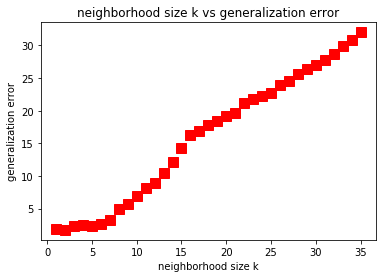

We notice that the generalization error is the minimum when the neighborhood size is small, and is large when the neighboorhood size is large.


In [108]:
## Generate random input sample
N = 51
x = []
y = []
for i in range(0, N):
    mu, sigma = 0, 1.15 ## mean and standard deviation
    noise = np.random.normal(mu, sigma, 1)
    
    temp_x = random.randint(-4,4)
    temp_y = temp_x**2 + noise
    
    x.append(temp_x)
    y.append(temp_y)
    
## Just storing for future use
x_store = x
y_store = y
    
## Splitting data into train and validate sets
split_size = random.randint(1, len(x)-1)
train_x = x[0:split_size]
train_y = y[0:split_size]
validate_x = x[split_size:]
validate_y = y[split_size:]
    
## Reshaping into np array
train_x = np.array(train_x)
validate_x = np.array(validate_x)
train_x = train_x.reshape(-1,1)
validate_x = validate_x.reshape(-1,1)
    
## Error Validation Set     
for k in range(len(train_x), 0, -1):
    result_validation_set = err_validation_set(train_x, train_y, validate_x, validate_y, k)
    plt.plot(k, result_validation_set, color = 'c', label="knn regressor")
    plt.plot(k, result_validation_set, 'rs', markersize=10, color = 'r')
    plt.title("neighborhood size k vs generalization error")
    plt.xlabel("neighborhood size k")
    plt.ylabel("generalization error")

plt.show()
print("We notice that the generalization error is the minimum when the neighborhood size is small, and is large when the neighboorhood size is large.")

In [111]:
x = x_store
y = y_store

k_folds = 
k_for_knn_reg = 3

k_fold_cross_validation(x, y, k_folds, k_for_knn_reg)

1.8713406532314325